# ch15 olist db insert

지금까지 python 코드로 데이터 베이스에 데이터를 집어넣고, SQL로 원하는 데이터를 읽어와서 시각화하는 방법을 배워봤습니다.  
이번 시간에는 실제 브라질의 이커머스 기업의 데이터를 가지고 분석 작업을 수행해보겠습니다.  

## 데이터 셋 준비

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

olist라는 브라질의 이커머스 기업이 자신들의 데이터 베이스를 공개하였습니다. 

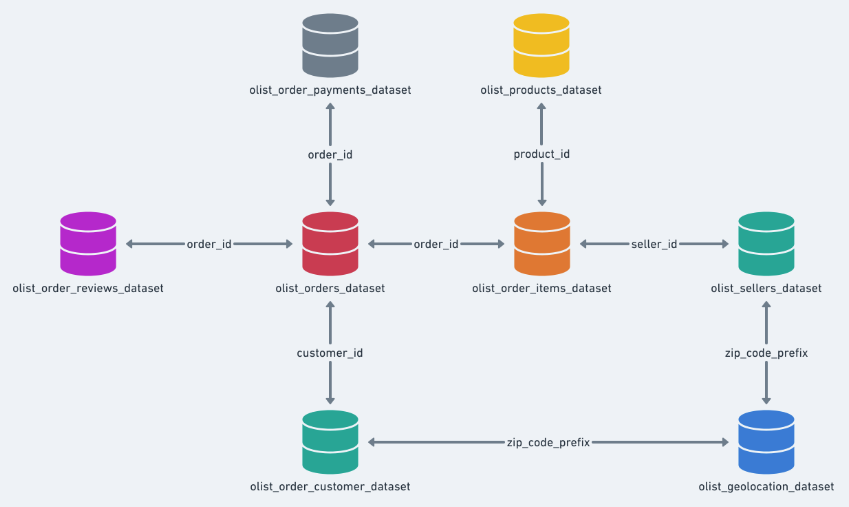

총 8개의 테이블로 이루어져 있으며, 수백만건의 이커머스 주문 데이터를 담고 있습니다.  
전체 데이터 셋의 구성과 관계를 파악하지는 않을거고, 그 중에서 일부만 가져와서 실습을 해보겠습니다.

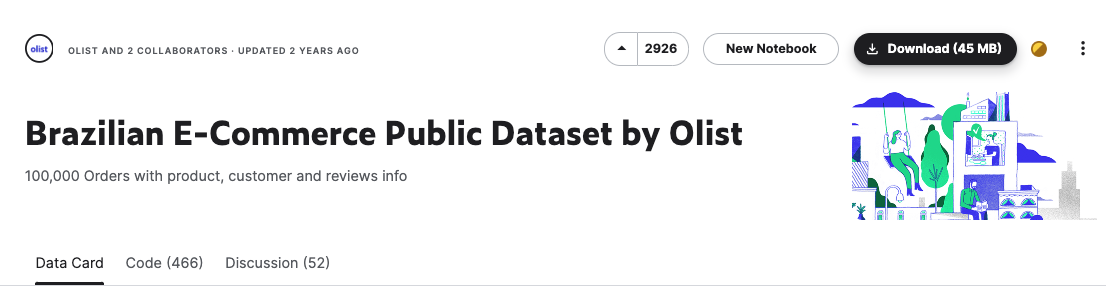

먼저 kaggle로 이동해서 데이터 셋을 다운로드 받아주세요.  

그 다음, 압축을 풀어주면 각 테이블 별로 CSV 파일이 보일겁니다.

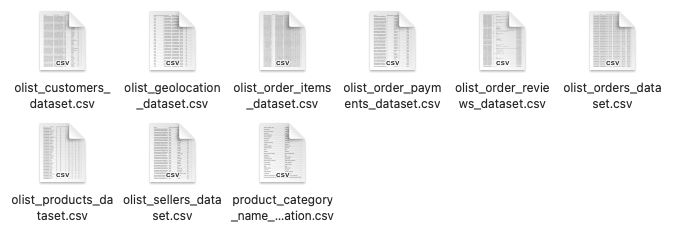

이 파일들에서 우리는 olist_orders_dataset.csv 파일과 olist_order_payments_dataset.csv 두 개의 파일을 사용할 겁니다.  
data 폴더 아래에 위치시킨 뒤, 각각 olist_orders.csv와 olist_order_payments.csv로 이름을 바꿔주겠습니다.

## 데이터 셋 살펴보기

각 파일들을 열어서 실제로 어떻게 생겼는지 확인해보겠습니다.  
olist_orders_dataset 파일은 주문 데이터가 저장되어 있습니다. 
- order_id: 주문 id
- customer_id: 고객 id
- order_status: 배송 상태
- order_purchase_timestamp: 결제 일자
- order_approved_at: 주문 승인 일자
- order_delivered_carrier_date: 물류센터 도착 일자
- order_delivered_customer_date: 고객에게 전달 완료 일자
- order_estimated_delivery_date: 예상 도착 일자

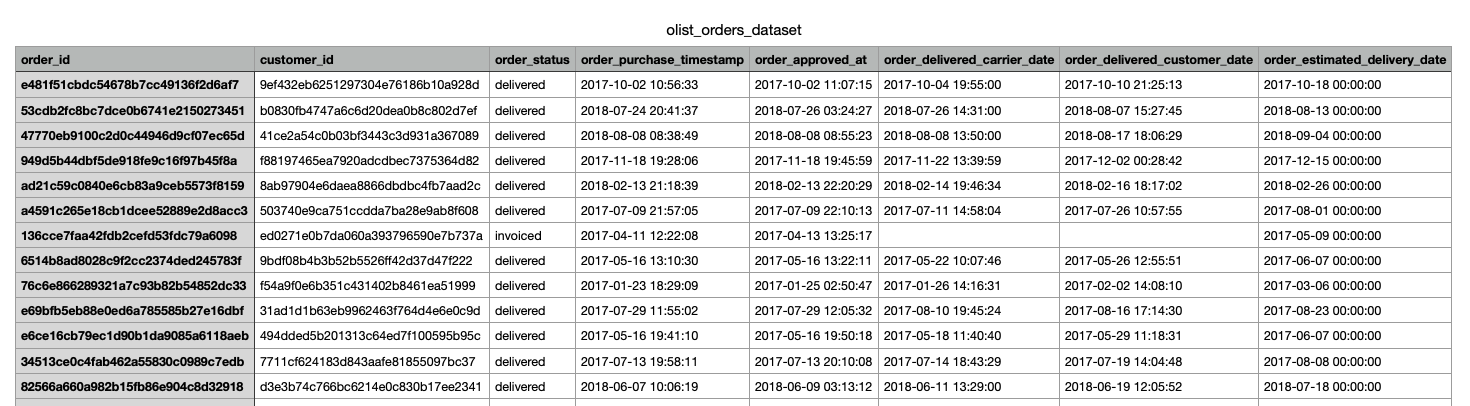

다음으로 olist_order_payments_dataset에는 각 주문별로 결제와 관련된 데이터가 저장되어 있습니다.  
- order_id: 주문 id
- payment_sequential: 결제 일련 번호 (하나의 주문에 여러개의 결제 수단이 선택될 수 있음. 각 결제 수단별 일련 번호)
- payment_type: 결제 유형
- payment_installments: 할부 횟수
- payment_value: 결제 금액

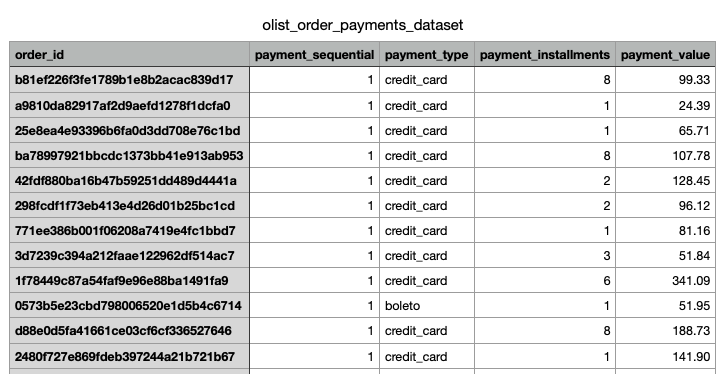

## DB 테이블 만들기

먼저 데이터 베이스에 olist_orders와 olist_order_payments 테이블을 만들어보겠습니다.  
행의 일련번호를 나타내는 id라는 컬럼을 하나 추가했고, 이를 PK로 지정했습니다.  
그리고 AI에 체크를 해줬는데, 이는 auto_increment의 약자로 행을 하나 추가할 때마다 id 값이 자동으로 1씩 증가하도록 설정한 겁니다.

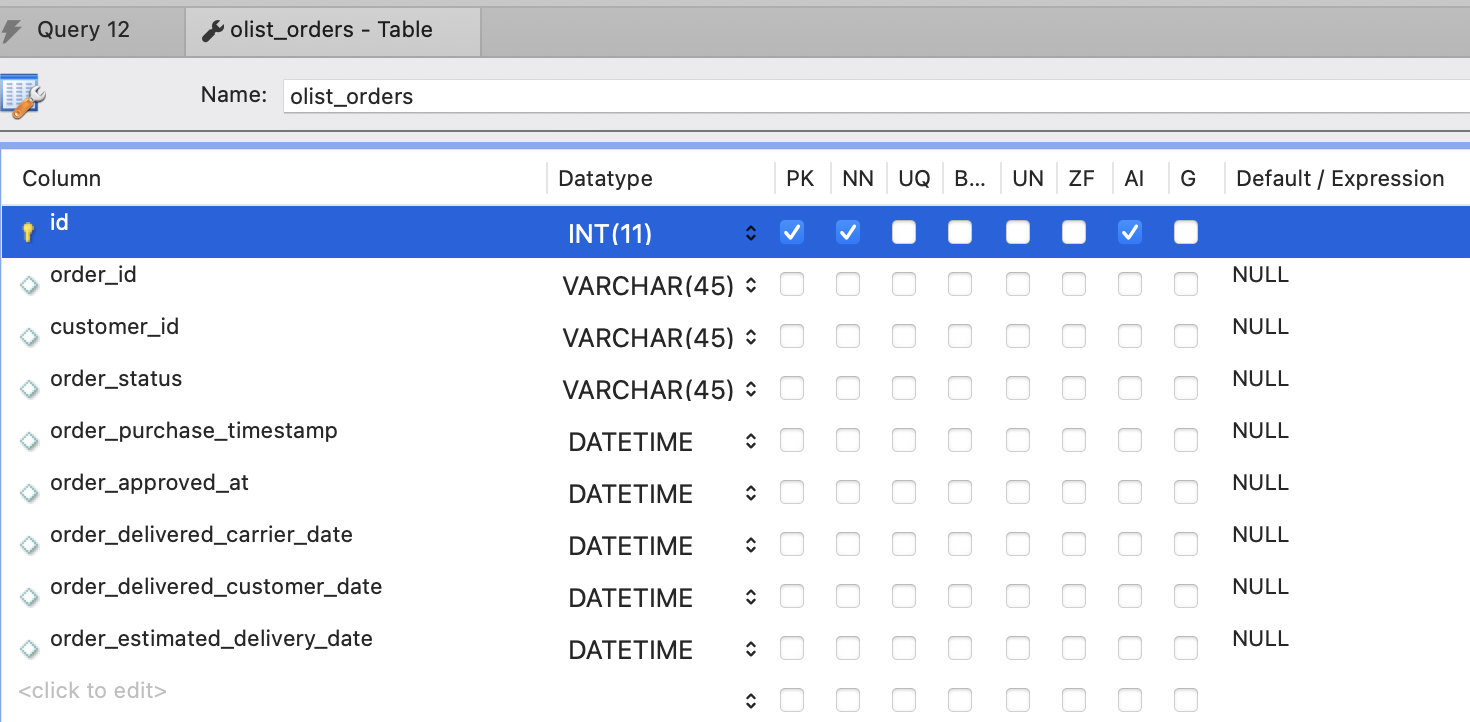

olist_order_payments 테이블도 만들어줍니다. 이 때 id 컬럼 추가된 걸 신경써줘야 합니다.

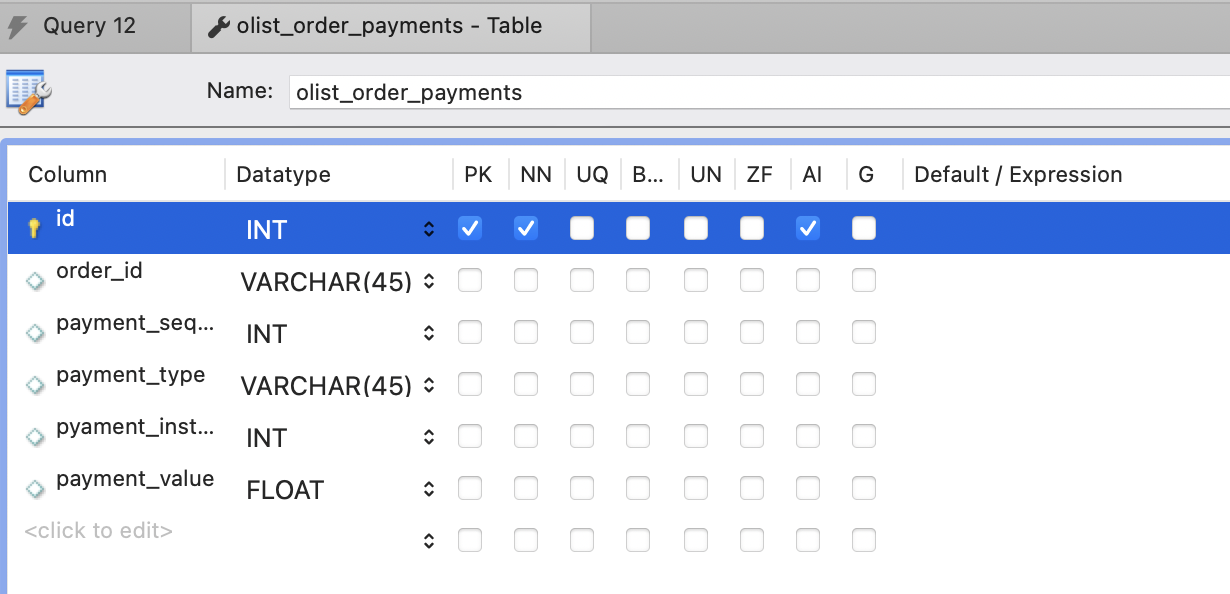

## 데이터 쓰기

이전 시간에 작성했던 bulk_write 함수를 복사해와서 SQL문을 파라미터로 전달받도록 살짝 수정하겠습니다.  
각 테이블 별로 SQL문을 다르게 작성해주기 위함입니다.

## 데이터 확인

각 테이블 별로 약 10만건의 데이터가 잘 들어갔는지 확인해보겠습니다.

## 인덱스 생성하기

주문이 이루어진 시간은 olist_orders 테이블에, 주문 결제 금액은 olist_order_payments 테이블에 나뉘어 있습니다.  
만약 일별 매출 추이를 집계하고 싶다면 어떻게 할 수 있을까요?  
바로 두 테이블을 조인한 다음, 주문이 이루어진 날짜 별로 GROUP BY를 해서 SUM을 해주는 겁니다.  

그런데 각 테이블별로 레코드가 10만개씩 들어있습니다.  
이를 그대로 조인하게 되면, 연산이 너무 많아서 오랜 시간이 걸립니다.
이럴 때 활용할 수 있는 것이 인덱스입니다.  
olist_order_payments 테이블의 order_id 컬럼에 인덱스를 걸어주면 조인 연산이 획기적으로 빨라집니다.


먼저 커넥션이 열려있으면 인덱스 생성 작업이 진행되지 않으므로 커넥션을 종료하겠습니다.

workbench 상에서 인덱스를 생성해보겠습니다.  
table inspector에 indexes로 이동해서 order_id 컬럼을 선택한 다음  
create index for selected columns를 눌러주세요.

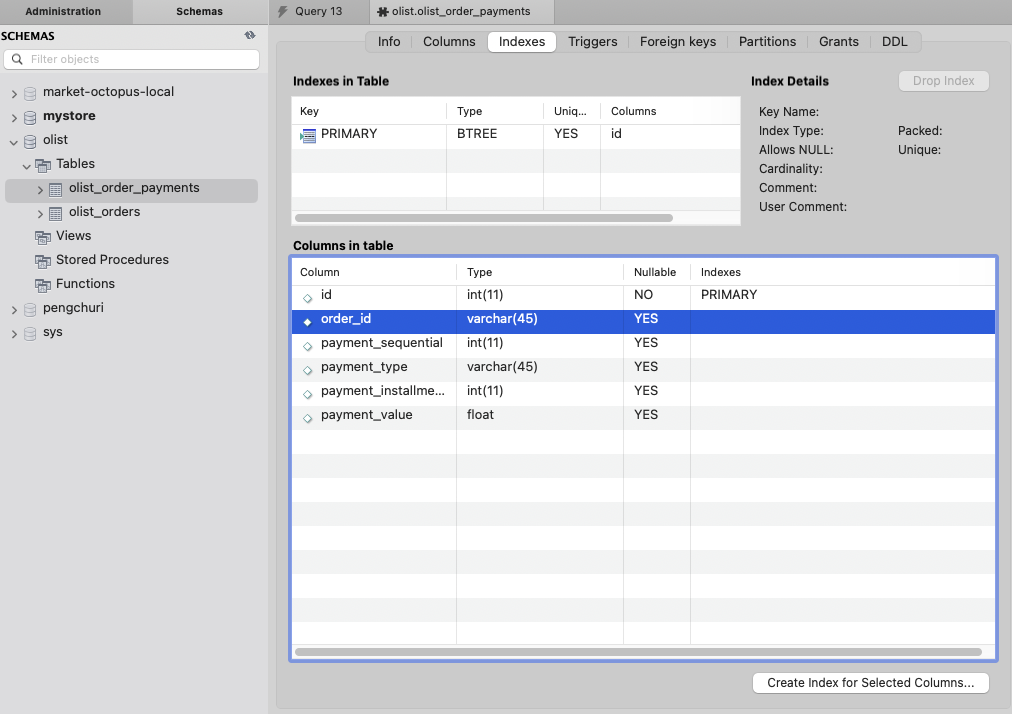

그 다음, olist_orders 테이블에서 2017년 1월 1일부터 2017년 1월 31일까지 데이터만 읽어오도록 SQL문을 작성하고 실행해보겠습니다. 

우리가 원하는 건 날짜별 매출입니다.  
timestamp 값에 DATE 함수를 적용해서 날짜만 추출해보겠습니다.  

이제 olist_order_payments 테이블과 조인해서 결제 금액을 가져오겠습니다.

이제 날짜별로 GROUP BY를 한 뒤에 매출액을 합쳐보겠습니다.  
order_id는 필요 없으니 생략하겠습니다.

## 매출 추이 시각화

이제 seaborn을 이용해서 2017년 1월의 매출 변화를 시각화 해보겠습니다. 이 때는 lineplot을 이용하는 것이 편합니다.

## 연습문제

1. 2018년 1월 일별 매출 추이를 그려보세요
2. 2018년 1월 결제 수단별 매출액의 추이를 비교해보세요.
3. 2017년 한 해동안 주간 매출액 추이를 그려보세요. YEARWEEK라는 SQL 문법을 사용해보세요.

## 정리

여기까지 데이터 저장, 분석, 시각화까지 작은 데이터 분석 프로젝트를 진행해봤습니다.  
어떤가요? 생각보다 할만하지 않으신가요?  
간단한 python과 SQL문 만으로도 꽤나 그럴듯한 분석을 할 수 있었습니다.  
지금까지 배운 내용을 잘 복습해서 본인 것으로 만드시기 바랍니다.